# Stochastic Robustness Explorer

Analyse stochastic playback ensembles for the synthetic medium bundle using preset sampling configurations.

In [1]:
from pathlib import Path
import sys

PROJECT_ROOT = Path.cwd().resolve()
while PROJECT_ROOT != PROJECT_ROOT.parent and not (PROJECT_ROOT / 'pyproject.toml').exists():
    PROJECT_ROOT = PROJECT_ROOT.parent
if not (PROJECT_ROOT / 'pyproject.toml').exists():
    raise RuntimeError('Notebook must be executed within a FHOPS checkout (pyproject.toml not found).')
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))

from docs.examples.analytics import utils

SCENARIO = PROJECT_ROOT / 'examples/synthetic/medium/scenario.yaml'
ASSIGNMENTS = PROJECT_ROOT / 'tmp/scaling/medium/user-1/sa_assignments.csv'  # update with fresh assignments if desired

(tables, sampling_config) = utils.run_stochastic_summary(SCENARIO, ASSIGNMENTS, tier='medium')
print(f'Samples: {sampling_config.samples}')
tables.shift.head()

Samples: 12


,day,shift_id,machine_id,machine_role,sample_id,production_units,total_hours,idle_hours,mobilisation_cost,sequencing_violations,blackout_conflicts,available_hours,utilisation_ratio,downtime_hours,downtime_events,weather_severity_total
0,1,S1,M2,forwarder,0,7.5033,10.024585,0.0,0.0,0,0,10.024585,1.0,0.0,0,0.1
1,2,S1,M2,forwarder,0,3.1492,10.024585,0.0,0.0,0,0,10.024585,1.0,0.0,0,0.6
2,8,S1,M1,harvester,0,13.8230,10.024585,0.0,0.0,0,0,10.024585,1.0,0.0,0,0.0
3,1,S1,M1,harvester,1,9.2510,10.024585,0.0,0.0,0,0,10.024585,1.0,0.0,0,0.0
4,2,S1,M2,forwarder,1,7.8730,10.024585,0.0,0.0,0,0,10.024585,1.0,0.0,0,0.0


### Production Distribution

Inspect the distribution of production across ensemble samples.

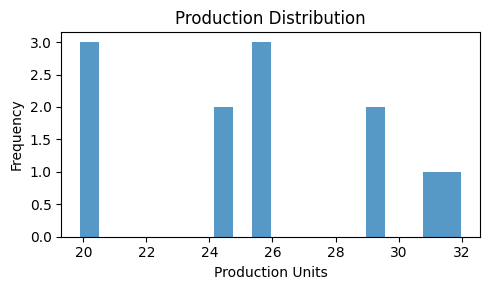

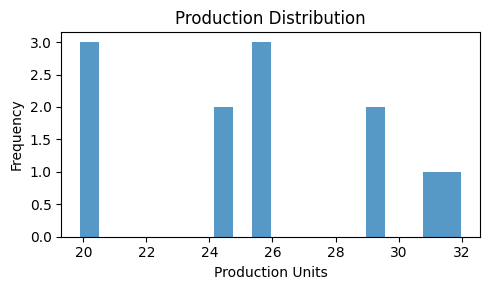

In [2]:
utils.plot_distribution(tables.shift.groupby('sample_id')['production_units'].sum(), title='Production Distribution', xlabel='Production Units')